In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [9]:
survived_counts = train_df['Survived'].value_counts()

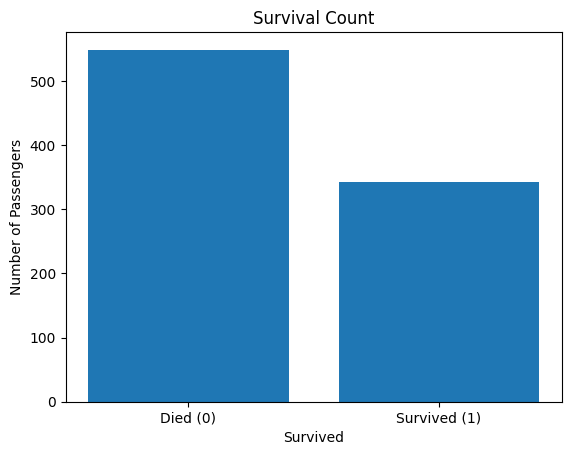

In [10]:
plt.bar(survived_counts.index, survived_counts.values)
plt.xticks([0, 1], ['Died (0)', 'Survived (1)'])
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

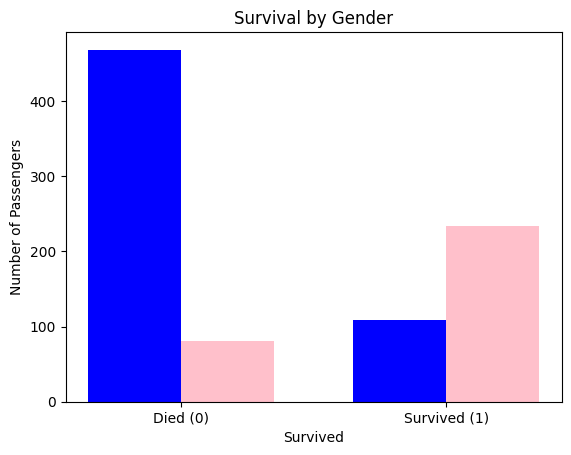

In [11]:
male_counts = train_df[train_df['Sex'] == 'male']['Survived'].value_counts()
female_counts = train_df[train_df['Sex'] == 'female']['Survived'].value_counts()
bar_width = 0.35
labels = ['Died (0)', 'Survived (1)']
x = range(len(labels))
plt.bar(x, male_counts.sort_index(), width=bar_width, label='Male', color='blue')
plt.bar([i + bar_width for i in x], female_counts.sort_index(), width=bar_width, label='Female', color='pink')
plt.xticks([i + bar_width/2 for i in x], labels)
plt.title('Survival by Gender')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.show

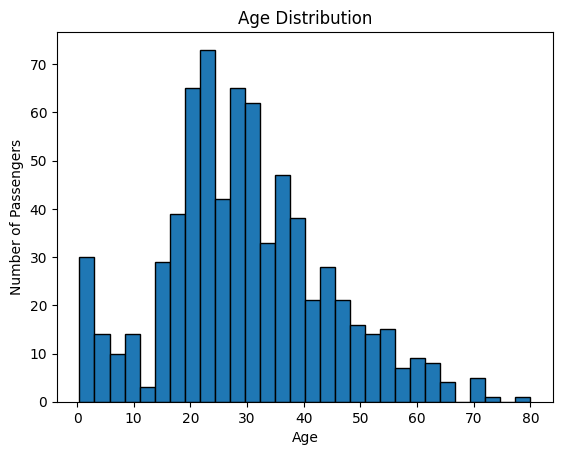

In [12]:
age_data = train_df['Age'].dropna()
plt.hist(age_data, bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

In [9]:
age_median = train_df['Age'].median()
train_df['Age'].fillna(age_median, inplace=True)
test_df['Age'].fillna(age_median, inplace=True)


C:\Users\ALI\AppData\Local\Temp\ipykernel_1636\194666021.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(age_median, inplace=True)
C:\Users\ALI\AppData\Local\Temp\ipykernel_1636\194666021.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [11]:
embarked_mode = train_df['Embarked'].mode()[0]
train_df['Embarked'].fillna(embarked_mode, inplace=True)

C:\Users\ALI\AppData\Local\Temp\ipykernel_1636\815073038.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(embarked_mode, inplace=True)


In [14]:
fare_median = train_df['Fare'].median()
test_df['Fare'].fillna(fare_median, inplace=True)
##didnt fill missing values in cabin since there are too missing values

C:\Users\ALI\AppData\Local\Temp\ipykernel_1636\2013724211.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(fare_median, inplace=True)


In [15]:
def extract_title(name):
    return name.split(',')[1].split('.')[0].strip()

train_df['Title'] = train_df['Name'].apply(extract_title)
test_df['Title'] = test_df['Name'].apply(extract_title)


In [16]:
from sklearn.preprocessing import LabelEncoder
bins = [0, 12, 19, 35, 60, 120]
labels = ['Child', 'Teenager', 'YoungAdult', 'Adult', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels)
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=bins, labels=labels)
le = LabelEncoder()
train_df['AgeGroup'] = le.fit_transform(train_df['AgeGroup'])
test_df['AgeGroup'] = le.transform(test_df['AgeGroup'])

In [26]:
le = LabelEncoder()

for col in ['Sex', 'Embarked','Fare']:
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

ValueError: y contains previously unseen labels: [np.float64(3.1708), np.float64(7.0), np.float64(7.2833), np.float64(7.575), np.float64(7.5792), np.float64(7.7208), np.float64(7.7792), np.float64(7.8208), np.float64(7.85), np.float64(8.9625), np.float64(9.325), np.float64(9.6875), np.float64(10.7083), np.float64(12.1833), np.float64(12.7375), np.float64(13.775), np.float64(13.9), np.float64(15.0333), np.float64(15.5792), np.float64(25.7), np.float64(25.7417), np.float64(27.4458), np.float64(28.5375), np.float64(31.5), np.float64(31.6792), np.float64(31.6833), np.float64(42.5), np.float64(45.5), np.float64(57.75), np.float64(60.0), np.float64(75.2417), np.float64(82.2667), np.float64(136.7792)]

In [27]:
columns_to_drop = ['Cabin', 'Ticket', 'Name', 'Age']
train.drop(columns=columns_to_drop, inplace=True)
test.drop(columns=columns_to_drop, inplace=True)

NameError: name 'train' is not defined

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
drop_cols = ['Cabin', 'Ticket', 'Name', 'Age']  
train_df.drop(columns=drop_cols, inplace=True)
test_df.drop(columns=drop_cols, inplace=True)

In [23]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X, y)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [24]:
print(X.dtypes)

PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
Title           object
AgeGroup         int64
dtype: object
